# Árboles de decisión

##  Cristina Gómez Alonso, Carlos Tessier

En este notebook utilizaremos como referencia el material de Aurelien Géron, sintetizado por Akranz, para explicar cómo entrenar, validar y realizar predicciones con **árboles de decisión** utilizando el dataset *Iris* y la librería **Scikit-learn**.

El dataset *Iris* es un conjunto clásico procedente del **UCI Machine Learning Repository**:
[https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)

A continuación revisaremos el algoritmo de entrenamiento **CART**, que es el que emplea `scikit-learn`, veremos cómo **regularizar** árboles para evitar sobreajuste y cómo utilizarlos también en **tareas de regresión**. Para finalizar, analizaremos varias **limitaciones** de los árboles de decisión y en qué situaciones no son la mejor opción.

## ¿Qué son los Árboles de Decisión?

Un árbol de decisión es una estructura que representa, de forma gráfica e interpretable, una serie de decisiones basadas en condiciones sobre las características del conjunto de datos. Es un algoritmo de **aprendizaje supervisado** muy usado, capaz de resolver tanto **clasificación** como **regresión**, y destaca por su simplicidad e interpretabilidad.

![arbol de decisión](https://miro.medium.com/v2/resize:fit:640/format:webp/1*BEH9fghOd9iYeGu8obk3PQ.png)

Principales características de los árboles de decisión:

* Clasifican los datos a partir de condiciones basadas en los atributos.
* Son una técnica de clasificación muy extendida en machine learning.
* Son modelos fáciles de interpretar, incluso por personas no expertas.
* También pueden utilizarse en regresión para estimar valores numéricos (ventas mensuales, precio de un vehículo, etc.).

Más información:

* [Wikipedia — Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Tutorial de Kaggle](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)







## Índice Gini

El índice Gini es la función de coste utilizada por defecto para evaluar la calidad de las divisiones en un árbol de decisión.

Una división en el conjunto de datos se define por un atributo de entrada y un umbral para dicho atributo, lo que permite separar los datos de entrenamiento en dos subconjuntos.

El valor del índice Gini mide el **grado de impureza** de los nodos resultantes, es decir, cuán mezcladas están las clases en cada subconjunto.
Una separación perfecta produce un índice Gini de **0**, mientras que la máxima impureza en un problema de **dos clases** se da cuando las clases están repartidas al 50 %, produciendo un valor de **0,5**.

---

## Entropy

`Entropy` es otra medida de impureza utilizada en árboles de decisión, basada en la **teoría de la información**. Mientras que el índice Gini mide la probabilidad de error al clasificar un elemento al azar, `entropy` mide la **incertidumbre** del sistema.

En la práctica:

* **Gini** es **más rápido de calcular** y por eso se usa por defecto en muchas implementaciones.
* **Entropy** es **más sensible a cambios en la distribución de las clases**.
* Ambos criterios suelen producir **árboles muy similares**.
* No existe un criterio universalmente mejor: la diferencia suele ser **pequeña y dependiente del problema**.



## 1. Importación de paquetes y dataset

Para entender los árboles de decisión, comencemos por construir uno y consultar sus predicciones:

In [464]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [465]:
iris = load_iris()

## 2. División del dataset

In [466]:
X = iris.data [:, 2:]  # Use only petal length and petal width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

## 3. Creación del modelo de Árboles de decisión

In [467]:
tree_clf = DecisionTreeClassifier(max_depth=2)

## 4. Entrenamiento

In [468]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## 5. Visualización del árbol de decisión

Podemos visualizar el árbol de decisiones utilizando el método export_graphiz() para exportar un archivo de representación gráfica y luego transformarlo a png:

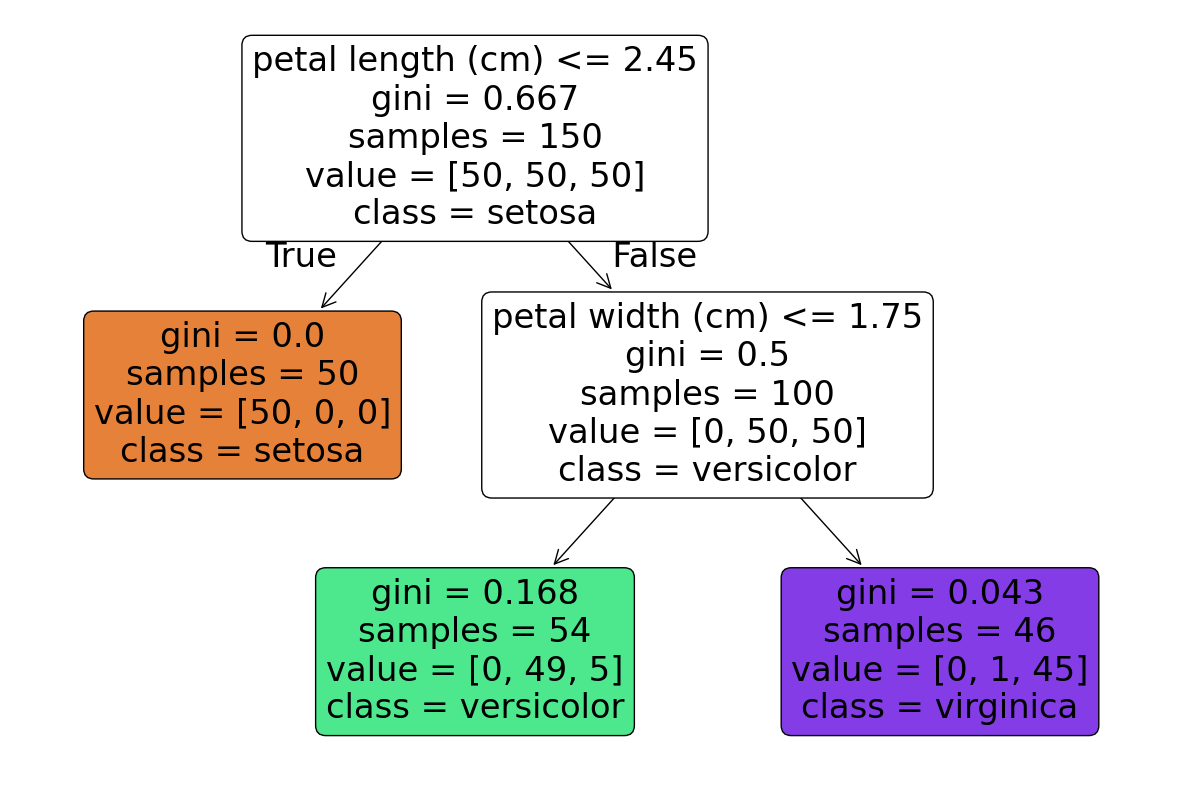

In [469]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size so the tree is legible
plt.figure(figsize=(15, 10))

# Plot the tree
plot_tree(tree_clf, 
          filled=True, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True)

plt.show()



## 8. Realización de predicciones — Versión revisada para el alumnado

Para clasificar un nuevo dato con un árbol de decisión seguimos un proceso muy directo: empezamos en el nodo raíz (la parte superior del árbol) y vamos respondiendo las preguntas binarias que aparecen en cada nodo. En cada paso avanzamos hacia la rama que corresponde a la condición que se cumple. Cuando llegamos a una hoja, esa hoja indica la clase final que el modelo asigna al dato.

Una ventaja importante de los árboles de decisión es que **apenas necesitan preparación de datos**: no es necesario escalar ni normalizar las variables, ya que las divisiones se basan en valores umbral y no en distancias.

Cada nodo del árbol incluye varios atributos que ayudan a interpretar cómo está tomando decisiones:

* **samples (muestras)**: cuántas instancias del conjunto de entrenamiento llegaron hasta ese nodo.
* **value (valor)**: cuántas muestras hay de cada clase dentro del nodo.
* **gini**: medida de impureza. Si un nodo tiene solo una clase, su impureza es 0 (es un nodo “puro”).

El índice Gini del nodo ( i ) se calcula mediante:

$
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$]$

donde $ p_{i,k} $ es la proporción de muestras de la clase $ k $ dentro del nodo. En nuestro caso, $ k \in {1,2,3} $.

En `scikit-learn`, los árboles se entrenan con el algoritmo **CART**, que siempre genera árboles binarios: cada nodo de decisión tiene dos ramas. Otros algoritmos clásicos, como **ID3**, sí pueden crear nodos con más de dos hijos.

En la figura siguiente se aprecia cómo un árbol va creando divisiones rectangulares en el espacio de características. Este comportamiento hace que los límites de decisión tengan forma de líneas rectas y zonas rectangulares:

![Boundaries](https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_iris_dtc_001.png)

En general, los árboles de decisión:

* son **intuitivos**
* sus predicciones se pueden **interpretar fácilmente**
* se consideran modelos de **“caja blanca”**

En contraste, métodos como **Random Forest** o las **redes neuronales profundas** se consideran modelos de **“caja negra”**, ya que resulta mucho más difícil interpretar cómo llegan a sus decisiones internas.





### 8.1. Estimando las probabilidades de pertenencia a cada clase

Un árbol de decisión también permite **estimar la probabilidad** de que una instancia pertenezca a cada clase. Para ello, toma la **hoja** en la que cae el dato y calcula la probabilidad como:

> proporción de muestras de esa clase
> entre el total de muestras presentes en la hoja.

En `scikit-learn`, estas probabilidades pueden consultarse con el método `predict_proba()`.

Por ejemplo, si introducimos una flor con **longitud de pétalo = 5** y **ancho de pétalo = 1.5**, el árbol puede devolver algo como:

* Clase 0 → 0.00
* Clase 1 → 0.90
* Clase 2 → 0.09

Lo que significa que, según el modelo, la clase más probable es la **clase 1**.



In [470]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [471]:
tree_clf.predict([[5, 1.5]])

array([1])


**Nota:** obtendremos la misma probabilidad para cualquier punto que caiga en la **misma hoja** del árbol. Aunque el nuevo dato esté más cerca o más lejos de los límites de decisión (*decision boundaries*), la probabilidad no cambia, porque todas las muestras dentro de una misma hoja comparten la misma distribución de clases.




## Regularización y sobreajuste en Árboles de Decisión

### ¿Por qué los árboles sobreajustan?

Los árboles de decisión tienden a **crecer demasiado** si no se les pone límite. Un árbol sin restricciones seguirá dividiéndose hasta separar completamente las muestras del conjunto de entrenamiento. Esto suele producir:

* **Exactitud perfecta en entrenamiento** (accuracy = 1.0)
* **Peor rendimiento en test**, porque el árbol aprende ruido y particularidades del dataset, no patrones generales.

Ejemplo simple con *Iris*:

```python
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))
```

Salida típica:

```
Train accuracy: 1.0
Test accuracy: 0.88
```

La diferencia entre ambos valores indica **overfitting**.

---

## ¿Cómo evitar el sobreajuste?

La solución es **controlar la complejidad del árbol** mediante **hiperparámetros de regularización**. 

### Ejemplo visual: árbol sin podar vs. árbol podado

En los árboles de decisión, **podar (pruning)** consiste en eliminar ramas que aportan poca información o que no mejoran la capacidad predictiva del modelo. El objetivo es obtener un árbol **más simple**, **más generalizable** y con **menor riesgo de sobreajuste**.

![ejemplo pruning](https://miro.medium.com/v2/resize:fit:720/format:webp/1*WQfd2tteLlic7-pu_FxjfQ.png)

Este ejemplo muestra claramente la diferencia entre ambos modelos:

* **Árbol sin podar:**

  * Tiene más nodos y más profundidad.
  * Captura el ruido del conjunto de entrenamiento.
  * Presenta mayor varianza y tiende a sobreajustar.

* **Árbol podado:**

  * Es más pequeño y fácil de interpretar.
  * Elimina ramas poco relevantes.
  * Generaliza mejor a datos nuevos.

Los **hiperparámetros de regularización** más importantes son:

---

### 1. `max_depth`

Límite máximo de profundidad del árbol.

* Árbol más profundo → más complejo → más riesgo de overfitting.
* Árbol menos profundo → más simple → mejor generalización.

Ejemplo:

```python
clf = DecisionTreeClassifier(max_depth=5)
```

---

### 2. `min_samples_leaf`

Número mínimo de muestras que debe haber en una hoja.

* Obliga al árbol a no crear hojas con muy pocos datos.
* Reduce el ruido y suaviza las predicciones.

```python
clf = DecisionTreeClassifier(min_samples_leaf=10)
```

---

### 3. `min_samples_split`

Número mínimo de muestras necesarias para dividir un nodo.

* Evita divisiones innecesarias cuando hay muy pocas muestras disponibles.

```python
clf = DecisionTreeClassifier(min_samples_split=20)
```

---






## Búsqueda automática de mejores hiperparámetros

Podemos usar `GridSearchCV` para probar diferentes combinaciones y elegir las que mejor funcionen:

``` python
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
```

Esto permite al alumnado ver de forma práctica cómo mejorar un árbol sin adivinar los valores "a ojo".

---

## Post-pruning (poda tras el entrenamiento)

Además de limitar el crecimiento del árbol desde el principio (pre-pruning), también existe la **poda posterior**, que elimina ramas poco útiles una vez entrenado el árbol completo.

En `scikit-learn` se implementa con el parámetro:

* **`ccp_alpha`** → controla cuánto se poda el árbol.

Un valor más alto = árbol más pequeño.

Ejemplo final con un `ccp_alpha` ya elegido:

``` python

clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)
```

##  **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para los mismos datasets utilizados en la práctica de Regresión Logística**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **árbol de decisión** sobre un dataset ya preprocesado.
* Comparar su rendimiento frente al modelo de **regresión logística** visto en el notebook.
* Identificar posibles casos de **sobreajuste** y aplicar **regularización**.
* Interpretar las **reglas de decisión** y la **importancia de variables**.

El alumnado debe trabajar con **los mismos datasets** utilizados en el notebook:

* **Hipotiroidismo (hypothyroid.csv)** 
* **Titanic (titanic_train.csv)** 

### **PARTE 1 – Árbol de Decisión aplicado al dataset de Hipotiroidismo**

<div style="background-color:green;color:white">

<br>

Implementar el mismo flujo del notebook (carga → limpieza → transformación → división)

<br>

In [472]:
# importar dataset, preprocesar, escalar y dividir en train y test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# CARGA
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

columnas = []
columnas = names.split(" ")

df = pd.read_csv("data/hypothyroid.csv", names=columnas, na_values="?")


# LIMPIEZA Y TRANSFORMACIÓN
lista_columnas_eliminadas = []

for columna in df.columns:
    if (("measured" in columna) or ("query" in columna)):
        lista_columnas_eliminadas.append(columna)
lista_columnas_eliminadas.append("TBG")

df.drop(columns=lista_columnas_eliminadas, inplace=True)

df.dropna(inplace=True)

def class_convert(response):
    if (response == "hypothyroid"):
        return 1
    else:
        return 0
    
df["response"] = df["response"].apply(class_convert)

df["TSH"] = np.log1p(df["TSH"])
df["T3"] = np.log1p(df["T3"])
df["TT4"] = np.log1p(df["TT4"])
df["T4U"] = np.log1p(df["T4U"])
df["FTI"] = np.log1p(df["FTI"])


variables_categoricas = df.select_dtypes(include=["object", "category"]).columns

df_dummies = pd.get_dummies(df, columns=variables_categoricas, drop_first=False)
df_dummies.head(50)


# DIVISIÓN TRAIN / TEST
X = df_dummies.drop(columns=["response"])
y = df_dummies["response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

---

<div style="background-color:green;color:white">

#### **1. Crear el modelo de árbol básico**

<br>

In [473]:
arbol_decision = DecisionTreeClassifier()

arbol_decision.fit(X_train, y_train)

y_pred = arbol_decision.predict(X_test)

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

Accuracy: 0.99
Recall: 0.93
F1-score: 0.91


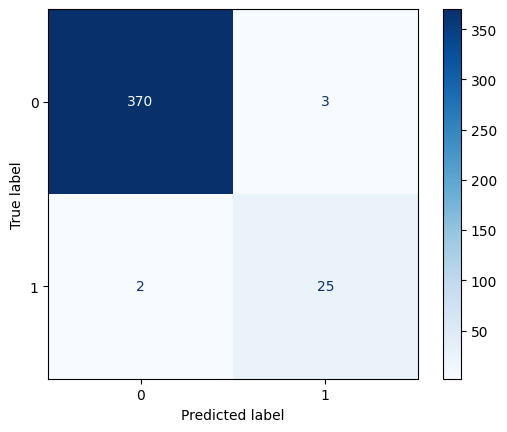

In [474]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

matriz_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=["0", "1"])
disp.plot(cmap="Blues")
plt.show()


#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

Comprobar el score de train y test:

<br>

In [475]:
score_train = arbol_decision.score(X_train, y_train)
score_test = arbol_decision.score(X_test, y_test)

print(f"Score train: {score_train:.3f}")
print(f"Score test: {score_test:.3f}")

Score train: 0.999
Score test: 0.988


<div style="background-color:green;color:white">

<br>

¿Tu modelo tiene accuracy perfecto en entrenamiento pero baja en test?

<br>

#### **4. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar *GridSearchCV* para probar diferentes combinaciones y elegir las que mejor funcionen


<br>

In [476]:
nuevo_arbol_decision = DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=4)

nuevo_arbol_decision.fit(X_train, y_train)

y_pred = nuevo_arbol_decision.predict(X_test)


<div style="background-color:green;color:white">

<br>

Comparar rendimiento entre:

* Árbol sin regularización
* Árbol regularizado


<br>

In [477]:
score_train_sin_regularizacion = arbol_decision.score(X_train, y_train)
score_test_sin_regularizacion = arbol_decision.score(X_test, y_test)

score_train_con_regularizacion = nuevo_arbol_decision.score(X_train, y_train)
score_test_con_regularizacion = nuevo_arbol_decision.score(X_test, y_test)

print(f"Score train (Sin Regularización): {score_train_sin_regularizacion:.3f}")
print(f"Score test (Sin Regularización): {score_test_sin_regularizacion:.3f}\n")

print(f"Score train (Con Regularización): {score_train_con_regularizacion:.3f}")
print(f"Score test (Con Regularización): {score_test_con_regularizacion:.3f}\n")

Score train (Sin Regularización): 0.999
Score test (Sin Regularización): 0.988

Score train (Con Regularización): 0.987
Score test (Con Regularización): 0.990



#### **5. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable aparece como la más influyente para detectar hipotiroidismo?
2. ¿Coincide con lo observado con la regresión logística (coeficientes)? 

<br>

In [478]:
importancia = pd.DataFrame({
    "variable": X_train.columns,
    "importancia": nuevo_arbol_decision.feature_importances_
}).sort_values("importancia", ascending=False)

importancia

,variable,importancia
5,FTI,0.851175
1,TSH,0.148825
0,age,0.000000
13,thyroid_surgery_t,0.000000
22,goitre_f,0.000000
21,lithium_t,0.000000
20,lithium_f,0.000000
19,tumor_t,0.000000
18,tumor_f,0.000000
17,sick_t,0.000000


### **PARTE 2 – Árbol de Decisión aplicado al dataset del Titanic**

Usando exactamente el mismo preprocesamiento del notebook de regresión logística, se pide repetir el análisis:





In [479]:
df = pd.read_csv("data/titanic_train.csv")

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode)

columnas_para_quitar = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns=columnas_para_quitar)

df_dummies = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

X = df_dummies.drop(columns=["Survived"])
y = df_dummies["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<div style="background-color:green;color:white">

#### **1. Crear el modelo de árbol básico**

<br>

In [480]:
arbol_basico = DecisionTreeClassifier()

arbol_basico.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

Accuracy: 0.79
Recall: 0.72
F1-score: 0.71


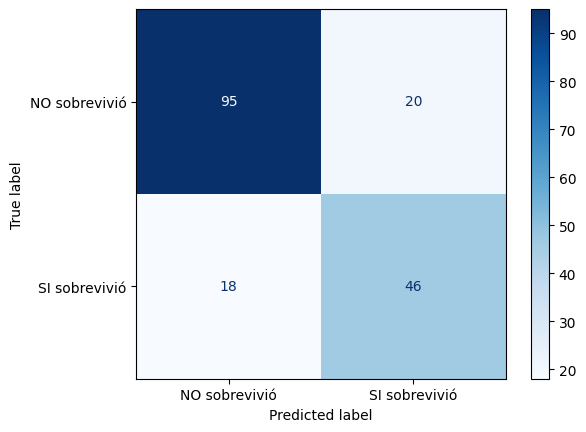

In [481]:
y_pred = arbol_basico.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

matriz_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=["NO sobrevivió", "SI sobrevivió"])
disp.plot(cmap="Blues")
plt.show()

<div style="background-color:green;color:white">

<br>

1. ¿Detecta mejor a los supervivientes que la regresión logística?
2. ¿Tiene más falsos positivos?


<br>

Si, detecta mejor a los supervivientes y comete menos errores

#### **3. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*


<br>

In [482]:
arbol_mejorado = DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=4)

arbol_mejorado.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=4)

<div style="background-color:green;color:white">

<br>

¿El modelo mejora en generalización?

¿Se reduce el sobreajuste?


<br>

Accuracy: 0.77
Recall: 0.47
F1-score: 0.59


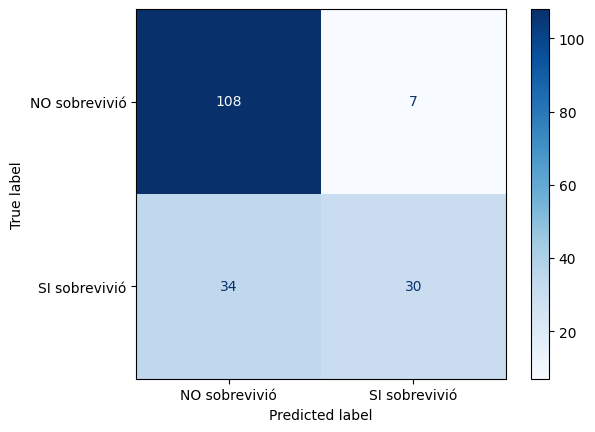

In [483]:
y_pred = arbol_mejorado.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

matriz_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=["NO sobrevivió", "SI sobrevivió"])
disp.plot(cmap="Blues")
plt.show()

#### **4. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable es la más determinante para sobrevivir según el árbol?
2. ¿Coincide con lo observado en la regresión logística (coeficiente de Sex_male)?


<br>

In [484]:
importancia = pd.DataFrame({
    "variable": X_train.columns,
    "importancia": arbol_mejorado.feature_importances_
}).sort_values("importancia", ascending=False)

importancia

,variable,importancia
5,Sex_male,0.725435
0,Pclass,0.184324
1,Age,0.090240
2,SibSp,0.000000
3,Parch,0.000000
4,Fare,0.000000
6,Embarked_C,0.000000
7,Embarked_Q,0.000000
8,Embarked_S,0.000000


La variable más determinante es **Sex_male**, que coincide con la regresión logística

#### **5. Visualizar el árbol**

<br>

<div style="background-color:green;color:white">

Comparar el árbol de decisión del modelo sin podar y el modelo podado.


<br>

In [485]:
score_train_sin_regularizacion = arbol_basico.score(X_train, y_train)
score_test_sin_regularizacion = arbol_basico.score(X_test, y_test)

score_train_con_regularizacion = arbol_mejorado.score(X_train, y_train)
score_test_con_regularizacion = arbol_mejorado.score(X_test, y_test)

print(f"Score train (Sin Regularización): {score_train_sin_regularizacion:.3f}")
print(f"Score test (Sin Regularización): {score_test_sin_regularizacion:.3f}\n")

print(f"Score train (Con Regularización): {score_train_con_regularizacion:.3f}")
print(f"Score test (Con Regularización): {score_test_con_regularizacion:.3f}\n")


Score train (Sin Regularización): 0.610
Score test (Sin Regularización): 0.642

Score train (Con Regularización): 0.610
Score test (Con Regularización): 0.642



#  **Ejemplo de Árboles de Decisión para Regresión**

Hasta ahora hemos visto que los **árboles de decisión** se utilizan principalmente para **clasificación**, es decir, para predecir **categorías** (por ejemplo: aprobado/suspenso, spam/no spam, enfermo/sano…).
Sin embargo, los árboles de decisión también pueden utilizarse para **regresión**, cuando lo que se desea predecir es un **valor numérico continuo**, como por ejemplo:

* El **precio de una vivienda**
* El **consumo eléctrico**
* La **nota media de un alumno**
* La **velocidad del viento**
* El **importe de una factura**

En este caso hablamos de **árboles de regresión**.

---

##  ¿Qué diferencia a un árbol de regresión de uno de clasificación?

La **estructura del árbol es casi idéntica**:

* Hay una **raíz**
* Hay **nodos intermedios**
* Hay **hojas**

La diferencia principal está en lo que ocurre en las **hojas**:

* En **clasificación**, cada hoja devuelve una **clase**
* En **regresión**, cada hoja devuelve un **valor numérico**, que suele ser:

> 🔹 **la media de los valores reales de las muestras que caen en esa hoja**

Es decir, el árbol **no inventa valores**, simplemente **promedia los datos reales que ya existen**.

## Funcionamiento del Árbol de Regresión

El árbol funciona así:

1. Toma los datos de entrenamiento.
2. Prueba todas las variables y muchos posibles cortes.
3. Divide el conjunto en dos partes.
4. Repite el proceso en cada parte.
5. Se detiene cuando:

   * Se alcanza una profundidad máxima.
   * O hay pocas muestras en un nodo.
   * O ya no se mejora la predicción.

Cuando llega a una hoja, el valor que devuelve es:

$
\hat{y} = \text{media de los valores reales de ese grupo}
$

## Función de Error: MSE (Error Cuadrático Medio)

En clasificación se usa **impureza (Gini o Entropía)**.
En regresión, el criterio de decisión es el **MSE (Mean Squared Error)**:

$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$

Donde:

* $ y_i $ es el valor real
* $ \hat{y}_i $ es el valor predicho
* $ m $ es el número de muestras

El árbol intenta hacer divisiones que **minimicen este error**.

---

## Algoritmo CART aplicado a Regresión

Scikit-learn utiliza el algoritmo **CART (Classification And Regression Tree)** tanto en clasificación como en regresión.

En regresión, el criterio de división es:

$
J(k,t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}
$

Es decir:

* Divide los datos en dos grupos.
* Calcula el error en cada grupo.
* Elige la división que produce **menor error total ponderado**.

⚠️ Este algoritmo es:

* **Greedy (avaro)** → solo busca la mejor división local.
* **No garantiza el árbol óptimo global**.
* Encontrar el árbol perfecto es un problema **NP–Completo**.

---

## Complejidad Computacional

### Predicción

La predicción consiste en recorrer el árbol desde la raíz hasta una hoja:

$
O(\log_2(m))
$

Ventaja clave:

✅ Es **muy rápida**

✅ No depende del número de variables

✅ Ideal para sistemas en tiempo real


###  Entrenamiento

El entrenamiento es más costoso:

$
O(n \cdot m \log_2(m))
$

Donde:

* ( n ) → número de características
* ( m ) → número de muestras

Por eso:

* Con pocos datos → entrenamiento rápido
* Con millones de datos → entrenamiento lento

---

## Problema Principal: Sobreajuste (Overfitting)

Los árboles de decisión **aprenden con muchísima precisión**, pero eso tiene un problema:

> Si no se limitan, **memorizan el ruido** de los datos.

Esto provoca:

* Excelente resultado en entrenamiento
* **Mal resultado en datos nuevos**

A esto lo llamamos **sobreajuste**.

##  Parámetros de Regularización

Para evitar el sobreajuste se usan estos parámetros:

| Parámetro           | Función                         |
| ------------------- | ------------------------------- |
| `max_depth`         | Limita la profundidad del árbol |
| `min_samples_leaf`  | Mínimo de muestras por hoja     |
| `min_samples_split` | Mínimo para dividir un nodo     |
| `max_leaf_nodes`    | Máximo número de hojas          |

👉 Aumentar estos valores = menos sobreajuste
👉 Disminuirlos = más riesgo de sobreajuste

## Ejemplo Práctico Interpretado

Se genera un conjunto de datos con esta forma:

$
y = (x - 0.5)^2 + \text{ruido}
$

In [486]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [487]:
# Generate noisy quadratic data
X = np.linspace(0, 1, 500)
y = (X - 0.5)**2 + np.random.randn(500) / 50.

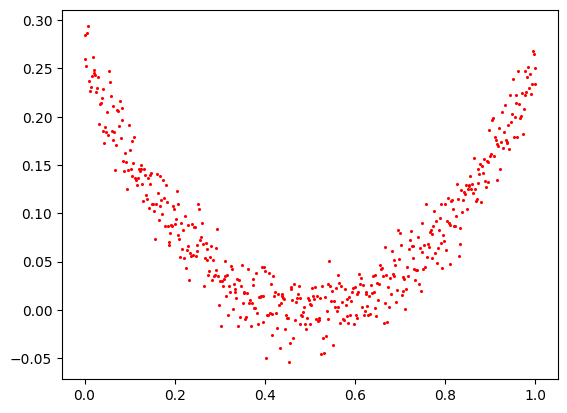

In [488]:
plt.scatter(X, y, s=1.5, c='red')


### Entrenamos un árbol con `max_depth = 2`

   ✔ Modelo simple
   
   ✔ Buena generalización

In [489]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [490]:
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

Visualización del árbol

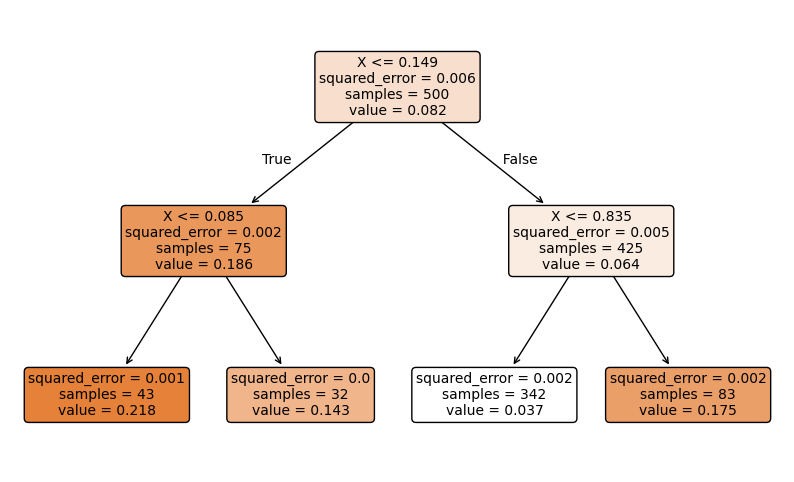

In [491]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    tree_reg,
    feature_names=['X'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


En este caso, el árbol funciona igual que en clasificación, pero cada hoja predice un **valor numérico**, correspondiente al **promedio de los valores reales** de las muestras que contiene.

---

### Predicciones


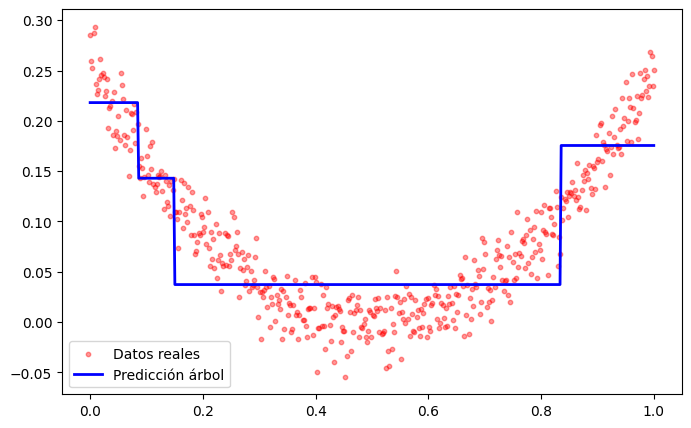

In [492]:
# Predicción sobre TODOS los puntos de X
y_pred = tree_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Entrenamos un árbol sin regularizar

❌ Memoriza el ruido

❌ Sobreajuste muy fuerte

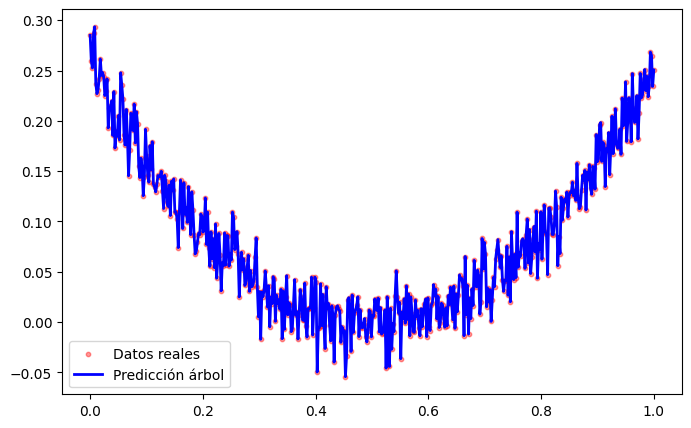

In [493]:
tree_no_reg = DecisionTreeRegressor()

tree_no_reg.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred2 = tree_no_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred2, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Árbol con min_samples_leaf = 10

✅ Modelo más estable

✅ Predicción más realista

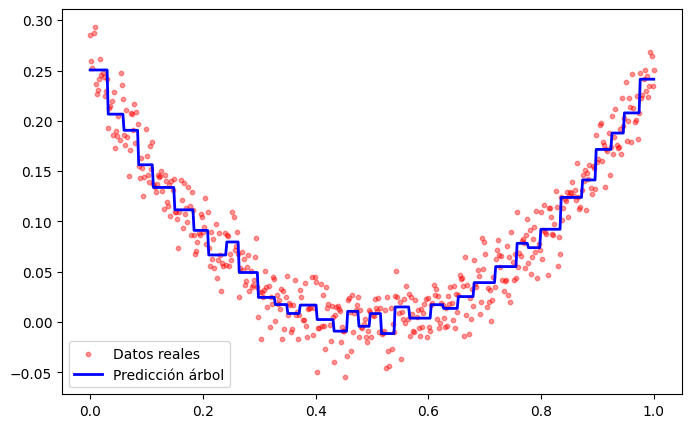

In [494]:
tree_reg_10 = DecisionTreeRegressor(min_samples_leaf=10)

tree_reg_10.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred10 = tree_reg_10.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred10, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

## **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para Regresión y compararlo con Regresión Lineal**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **modelo de Árbol de Decisión para Regresión (`DecisionTreeRegressor`)** sobre un dataset real.
* Comparar su rendimiento frente al modelo de **Regresión Lineal**.
* Identificar posibles casos de **sobreajuste (overfitting)**.
* Aplicar **regularización** en árboles de regresión.
* Interpretar la **importancia de las variables** en un modelo basado en árboles.

El alumnado trabajará con el **dataset del seguro médico**, ya utilizado previamente para Regresión Lineal:

* **insurance.csv** (coste de seguros médicos)

La variable objetivo es:

* **`charges` → coste anual del seguro**

### **PARTE 1 – Árbol de Decisión aplicado al dataset del Seguro Médico**



Implementamos el mismo flujo del notebook (carga → limpieza → transformación → división)



In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/insurance.csv')

##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### **1. Crear el modelo de Árbol de Decisión básico**

<div style="background-color:green;color:white">

<br>

* Crea un modelo inicial sin regularizar:

<br>

In [496]:
arbol_inicial = DecisionTreeRegressor()

---

<div style="background-color:green;color:white">

<br>

* Entrena el modelo con los datos de entrenamiento (*X_train*, *y_train*).
* Realiza predicciones sobre el conjunto de test.

<br>

In [497]:
arbol_inicial.fit(X_train, y_train)

y_pred = arbol_inicial.predict(X_test)

#### **2. Evaluar el rendimiento del modelo**

<div style="background-color:green;color:white">

<br>

Calcula las siguientes métricas sobre el conjunto de test:

* **MAE**
* **MSE**
* **RMSE**
* **R²**

<br>

In [498]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.3f}")

MAE: 758.405
MSE: 10345018.373
RMSE: 3216.367
R2: 0.934


<div style="background-color:green;color:white">

<br>

Representa en un gráfico:

* *y_test* frente a *y_pred*

Guarda los valores obtenidos para compararlos más adelante con los otros modelos.


<br>

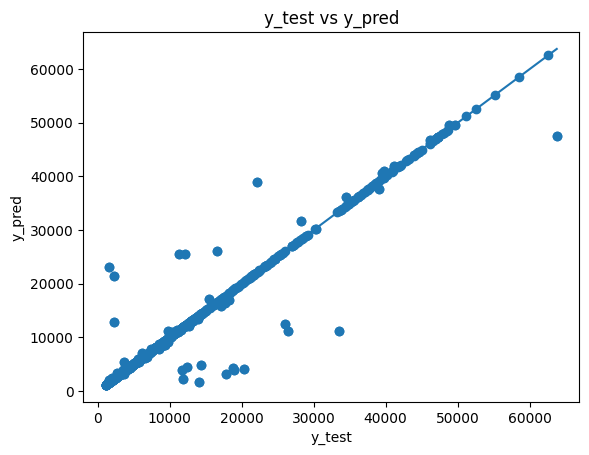

In [499]:
resultados_modelo = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()


#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

<br>

Compara:

* El rendimiento del árbol en **entrenamiento**
* El rendimiento en **test**


<br>

In [500]:
resultados_modelo.head(20)

,y_test,y_pred
1106,8988.15875,8988.15875
1321,28101.33305,28101.33305
2313,12032.32600,12032.32600
2274,1682.59700,1682.59700
1432,3393.35635,3393.35635
2240,24106.91255,24106.91255
965,4746.34400,4747.05290
2626,47269.85400,47269.85400
2134,8556.90700,8551.34700
2296,2639.04290,2639.04290


<div style="background-color:green;color:white">

<br>

Responde:

* ¿Existe una diferencia grande entre ambos resultados?

    La diferencia es mínima en muy pocos resultados

* ¿Indica esto un posible sobreajuste?

    Si, parece que hay sobreajuste

* ¿Por qué los árboles tienden a sobreajustar con facilidad?

    Porque son modelos muy flexibles y pueden adaptarse en exceso a los datos de entrenamiento
<br>

#### **4. Aplicar regularización al Árbol de Decisión**

<div style="background-color:green;color:white">

<br>
Entrena nuevos modelos **modificando hiperparámetros de regularización**, por ejemplo:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar **GridSearchCV** para probar varias combinaciones y seleccionar la mejor.

<br>

In [501]:
arbol_regularizado = DecisionTreeRegressor(
    max_depth=6,
    min_samples_leaf=12,
    min_samples_split=5,
    random_state=42
)

arbol_regularizado.fit(X_train, y_train)

y_pred_regularizado = arbol_regularizado.predict(X_test)

mse_regularizado = mean_squared_error(y_test, y_pred)
r2_regularizado = r2_score(y_test, y_pred)
rmse_regularizado = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")


print(f"MSE: {mse_regularizado:.3f}")
print(f"R²: {r2_regularizado:.3f}")
print(f"RMSE: {rmse_regularizado:.3f}")

RMSE: 3216.367
MSE: 10345018.373
R²: 0.934
RMSE: 3216.367


<div style="background-color:green;color:white">

<br>

Comparar el rendimiento entre:

* Árbol **sin regularización**
* Árbol **regularizado**


<br>

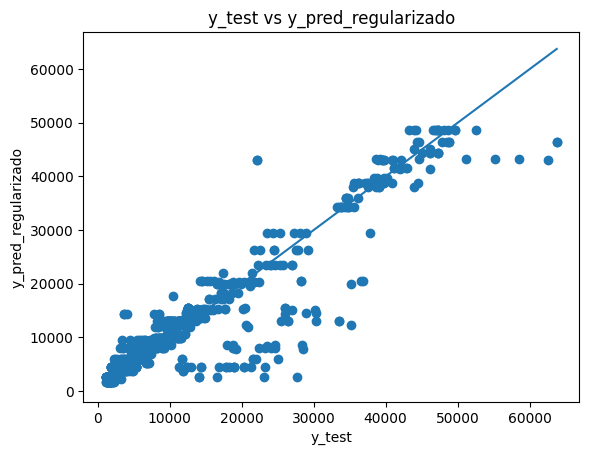

,y_test,y_pred
1106,8988.15875,9960.734362
1321,28101.33305,29398.506984
2313,12032.32600,12205.923891
2274,1682.59700,2568.569104
1432,3393.35635,9560.458642
2240,24106.91255,23459.894848
965,4746.34400,4530.938317
2626,47269.85400,48653.863249
2134,8556.90700,9960.734362
2296,2639.04290,2568.569104


In [503]:
resultados_modelo_regularizado = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_regularizado
})

plt.figure()
plt.scatter(y_test, y_pred_regularizado)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel('y_test')
plt.ylabel('y_pred_regularizado')
plt.title('y_test vs y_pred_regularizado')
plt.show()

resultados_modelo_regularizado.head(20)

<div style="background-color:green;color:white">

<br>


* ¿Disminuye el sobreajuste?

    Si, disminuye mucho el sobreajuste

* ¿Qué ocurre con el valor de R²?

    Es igual que el anterior

* ¿Cuál de los dos modelos generaliza mejor?

    El segundo modelo generaliza mejor
<br>

### **Comparación con el modelo de Regresión Lineal**

<div style="background-color:green;color:white">

<br>

Utiliza las métricas obtenidas previamente con **Regresión Lineal** y construye una tabla comparativa:

| Modelo                | MAE | RMSE | R² |
| --------------------- | --- | ---- | -- |
| Regresión Lineal      |     |      |    |
| Árbol sin regularizar |     |      |    |
| Árbol regularizado    |     |      |    |



Responde razonadamente:

* ¿Qué modelo obtiene mejor RMSE?
* ¿Qué modelo generaliza mejor?
* ¿En qué casos es preferible usar un árbol en lugar de una regresión lineal?
* ¿Qué modelo interpretarías mejor a nivel matemático?
* ¿Qué modelo tiene mayor capacidad de adaptación a relaciones no lineales?

<br>